In [13]:
# Import modules

import pandas as pd
import numpy as np

from shapely.geometry import Point, Polygon
from shapely import wkt
import matplotlib.pyplot as plt
%matplotlib inline

from geodaisy import GeoObject
from geojson import Point, Feature, FeatureCollection, dump

pd.set_option('display.max_columns', None)

Import store data:

In [14]:
stores = pd.read_csv('../assignment_data/stores.csv')
stores.head()

,store_id,store_name,wkt
0,place_1,McDonald's,POLYGON ((13.4611920000000005 52.4709870000000...
1,place_2,McDonald's,POLYGON ((13.4683480000000007 52.5471599999999...
2,place_3,McDonald's,POLYGON ((13.3128810000000009 52.4197929999999...
3,place_4,McDonald's,POLYGON ((13.3635780000000004 52.5606039999999...
4,place_5,McDonald's,POLYGON ((13.3230909999999998 52.5613460000000...


Change 'wkt' data type to Shapely Geometry to enable plotting of store locations:

In [15]:
stores['wkt'] = stores['wkt'].apply(wkt.loads)

Test on one store:

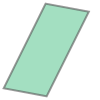

In [16]:
polygon1 = stores.iloc[0,2]
polygon1

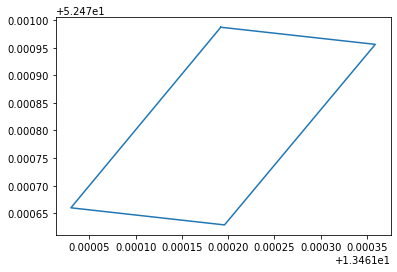

In [17]:
x,y = polygon1.exterior.xy
plt.plot(x,y)

Plot all stores:

Text(0.5, 1.0, 'Store Locations')

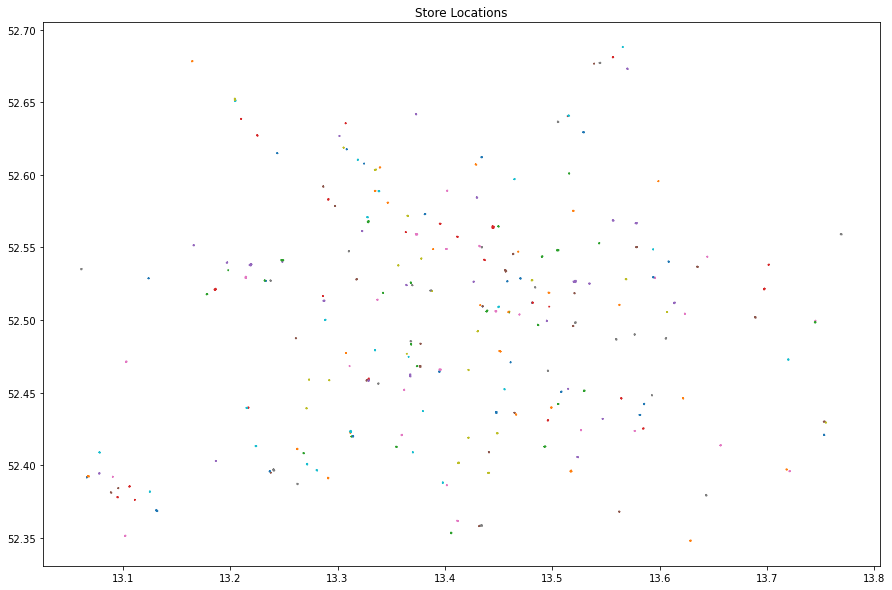

In [18]:
fig, ax = plt.subplots(figsize = (15,10))

for i in stores['wkt']:
    x,y = i.exterior.xy
    plt.plot(x,y)
plt.title('Store Locations')

The plot above appears to show a rough outline of Berlin. To clarify, the next step is to visualise the data in Tableau...

Use geodaisy to convert WKT data into GeoJSON:

In [10]:
geojson_list = []

for polygon in stores['wkt']:
    geojson_list.append(GeoObject(polygon))
stores['geojson'] = geojson_list

In [11]:
stores

,store_id,store_name,wkt,geojson
0,place_1,McDonald's,"POLYGON ((13.461192 52.470987, 13.46103 52.470...","{'type': 'Polygon', 'coordinates': [[(13.46119..."
1,place_2,McDonald's,"POLYGON ((13.468348 52.54716, 13.468408 52.547...","{'type': 'Polygon', 'coordinates': [[(13.46834..."
2,place_3,McDonald's,"POLYGON ((13.312881 52.419793, 13.313027 52.41...","{'type': 'Polygon', 'coordinates': [[(13.31288..."
3,place_4,McDonald's,"POLYGON ((13.363578 52.560604, 13.363576 52.56...","{'type': 'Polygon', 'coordinates': [[(13.36357..."
4,place_5,McDonald's,"POLYGON ((13.323091 52.561346, 13.323072 52.56...","{'type': 'Polygon', 'coordinates': [[(13.32309..."
...,...,...,...,...
242,place_243,Renault,"POLYGON ((13.368612 52.483109, 13.368327 52.48...","{'type': 'Polygon', 'coordinates': [[(13.36861..."
243,place_244,Renault,"POLYGON ((13.286386 52.516469, 13.286397 52.51...","{'type': 'Polygon', 'coordinates': [[(13.28638..."
244,place_245,Lexus,"POLYGON ((13.519827 52.526533, 13.520206 52.52...","{'type': 'Polygon', 'coordinates': [[(13.51982..."
245,place_246,Sparkasse,"POLYGON ((13.53892 52.676637, 13.538657 52.676...","{'type': 'Polygon', 'coordinates': [[(13.53892..."


Use geojson to export the DF to a GeoJSON file, which enables visualisation in Tableau:

In [43]:
features = []

for store, name, polygon in zip(stores['store_id'], stores['store_name'], stores['geojson']):
    features.append(Feature(geometry=polygon, properties={'store_id': store, 'store_name': name}))
    feature_collection = FeatureCollection(features)
    with open(f'../results/stores.geojson', 'w') as f:
        dump(feature_collection, f)

Link to Tableau visualisation - https://public.tableau.com/profile/paul.musco#!/vizhome/adsquare_store_locations/AdSquareassignment-StoreLocations